# code title

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv("data.csv",index_col=[0])

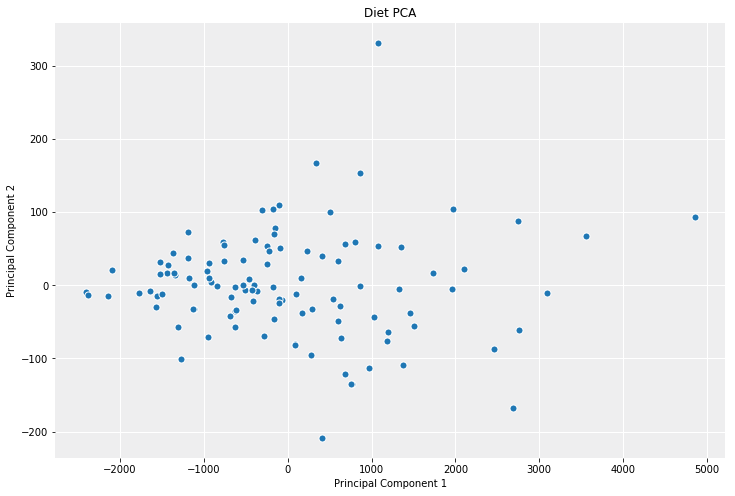

In [22]:
def prettify_ax(ax):
    ''' Nifty function to make axes more pleasant to look at '''
    for spine in ax.spines.itervalues():
        spine.set_visible(False)
    ax.set_frameon=True
    ax.patch.set_facecolor('#eeeeef')
    ax.grid('on', color='w', linestyle='-', linewidth=1)
    ax.tick_params(direction='out')
    ax.set_axisbelow(True)
    
def simple_ax(figsize=(6,4), **kwargs):
    ''' Shortcut to make and 'prettify' a simple figure with 1 axis '''
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, **kwargs)
    prettify_ax(ax)
    return fig, ax

def PCA(input_X, R=10, mean_center_input=False):
    ''' run pca projection onto R dimensions '''
    if mean_center_input:
        input_X = (input_X.T - input_X.T.mean()).T 
    number_of_samples = input_X.shape[1]
    eigs, V = np.linalg.eigh((1./number_of_samples) *  input_X.T.dot(input_X))
    sort_order = (-eigs).argsort()
    eigs = eigs[sort_order]
    V = V[:, sort_order]
    inv_sqrt_D_R = np.diag(1./np.sqrt(eigs[:R]))
    V_R = V[:, :R]
    U_R = input_X.dot(V_R).dot(inv_sqrt_D_R)/np.sqrt(number_of_samples)
    P_R = U_R.T.dot(input_X)
    P_R.index = ['PC%d'%s for s in range(1, R+1)]
    return eigs, P_R

def PCA_loadings(input_X, PCA_projection):
    ''' determine loadings for a pca project and input data '''
    whitened_PCA_projection = (PCA_projection.T/PCA_projection.std(1,ddof=0)).T
    whitened_input_X = ((input_X.T - input_X.T.mean())/input_X.T.std(ddof=0)).T
    number_of_genes, number_of_samples = whitened_input_X.shape
    loadings = (1./number_of_samples)*whitened_input_X.dot(whitened_PCA_projection.T)
    return loadings

# run PCA and plot data
pca_eigs, pca_P_R = PCA(df.T, R=3, mean_center_input=True)
pc_fig, pc_ax = simple_ax(figsize=(12,8))
pc_ax.scatter(pca_P_R.loc['PC1'], pca_P_R.loc['PC2'], edgecolor='w', s=50)
pc_ax.set_xlabel('Principal Component 1')
pc_ax.set_ylabel('Principal Component 2')
pc_ax.set_title('Diet PCA')
plt.show()